# Data analysis of all printed cards in MTG history

download data : _https://mtgjson.com/api/v5/AllPrintingsCSVFiles.zip_

Magic The Gathering is a renowned collectible card game created by mathematician Richard Garfield in 1993 and published by Wizards of the Coast.  
The game has released numerous expansion sets, core sets, promotional cards, and other special releases.

The dataset I'm going to use for this analysis, contains information about every card printed in the game's history.  
Some card can appear multiple time in the "name" column time because:

- the card has been reprinted with some alteration(text, illustration, artist...)  
  <img src="./asset/cc2-7-sol-ring.jpg" width=200><img src="./asset/voc-168-sol-ring.jpg" width=200>

- the card has several parts or is double-sided,
  in this case the "name" column contains all the names,
  and the "faceName" column posses the name of the current part.  
  <img src="./asset/dis-153-odds.jpg" width=200>
  <img src="./asset/bok-122-budoka-pupil.jpg" width=200>
  <img src="./asset/eld-14-giant-killer.jpg" width=200>
  <img src="./asset/emn-15a-bruna-the-fading-light.jpg" width=200>
  <img src="./asset/emn-28-gisela-the-broken-blade.jpg" width=200>
  <img src="./asset/emn-15b-brisela-voice-of-nightmares.jpg" width=200>


## Initialization

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows", 50)

default_df = pd.read_csv("./cards.csv", low_memory=False)
default_df.head()

,index,id,artist,asciiName,attractionLights,availability,boosterTypes,borderColor,cardKingdomEtchedId,cardKingdomFoilId,cardKingdomId,cardParts,cardsphereId,colorIdentity,colorIndicator,colors,convertedManaCost,defense,duelDeck,edhrecRank,edhrecSaltiness,faceConvertedManaCost,faceFlavorName,faceManaValue,faceName,finishes,flavorName,flavorText,frameEffects,frameVersion,hand,hasAlternativeDeckLimit,hasContentWarning,hasFoil,hasNonFoil,isAlternative,isFullArt,isFunny,isOnlineOnly,isOversized,isPromo,isRebalanced,isReprint,isReserved,isStarter,isStorySpotlight,isTextless,isTimeshifted,keywords,language,layout,leadershipSkills,life,loyalty,manaCost,manaValue,mcmId,mcmMetaId,mtgArenaId,mtgjsonFoilVersionId,mtgjsonNonFoilVersionId,mtgjsonV4Id,mtgoFoilId,mtgoId,multiverseId,name,number,originalPrintings,originalReleaseDate,originalText,originalType,otherFaceIds,power,printings,promoTypes,purchaseUrls,rarity,rebalancedPrintings,relatedCards,scryfallId,scryfallIllustrationId,scryfallOracleId,securityStamp,setCode,side,signature,subsets,subtypes,supertypes,tcgplayerEtchedProductId,tcgplayerProductId,text,toughness,type,types,uuid,variations,watermark
0,0,1,Pete Venters,NaN,NaN,"mtgo,paper",default,black,NaN,NaN,122719.0,NaN,20.0,W,NaN,W,7.0,NaN,NaN,19475.0,0.27,NaN,NaN,NaN,NaN,nonfoil,NaN,NaN,NaN,2003,NaN,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,First strike,English,normal,NaN,NaN,NaN,{5}{W}{W},7.0,16165.0,156.0,NaN,b7c19924-b4bf-56fc-aa73-f586e940bd42,NaN,ad41be73-582f-58ed-abd4-a88c1f616ac3,27501.0,27500.0,130550.0,Ancestor's Chosen,1,NaN,NaN,First strike (This creature deals combat damag...,Creature - Human Cleric,NaN,4,"10E,JUD,UMA",NaN,"{""cardKingdom"": ""https://mtgjson.com/links/9fb...",uncommon,NaN,NaN,7a5cd03c-4227-4551-aa4b-7d119f0468b5,be2f7173-c8b7-4172-a388-9b2c6b3c16e5,fc2ccab7-cab1-4463-b73d-898070136d74,NaN,10E,NaN,NaN,NaN,"Human,Cleric",NaN,NaN,15032.0,First strike (This creature deals combat damag...,4,Creature — Human Cleric,Creature,5f8287b1-5bb6-5f4c-ad17-316a40d5bb0c,b7c19924-b4bf-56fc-aa73-f586e940bd42,NaN
1,1,2,Pete Venters,NaN,NaN,"mtgo,paper",default,black,NaN,123087.0,NaN,NaN,NaN,W,NaN,W,7.0,NaN,NaN,19475.0,0.27,NaN,NaN,NaN,NaN,foil,NaN,"""The will of all, by my hand done.""",NaN,2003,NaN,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,First strike,English,normal,NaN,NaN,NaN,{5}{W}{W},7.0,16165.0,156.0,NaN,NaN,5f8287b1-5bb6-5f4c-ad17-316a40d5bb0c,fcd5d3ab-d58e-5cea-861a-cb377f37bf83,NaN,NaN,NaN,Ancestor's Chosen,1★,NaN,NaN,NaN,NaN,NaN,4,"10E,JUD,UMA",NaN,"{""cardKingdomFoil"": ""https://mtgjson.com/links...",uncommon,NaN,NaN,82072a1d-c1ab-4b4f-875f-d0591447e0a4,be2f7173-c8b7-4172-a388-9b2c6b3c16e5,fc2ccab7-cab1-4463-b73d-898070136d74,NaN,10E,NaN,NaN,NaN,"Human,Cleric",NaN,NaN,15032.0,First strike (This creature deals combat damag...,4,Creature — Human Cleric,Creature,b7c19924-b4bf-56fc-aa73-f586e940bd42,5f8287b1-5bb6-5f4c-ad17-316a40d5bb0c,NaN
2,2,3,Volkan Baǵa,NaN,NaN,"mtgo,paper",default,black,NaN,NaN,122720.0,NaN,22.0,W,NaN,W,5.0,NaN,NaN,15665.0,NaN,NaN,NaN,NaN,NaN,nonfoil,NaN,Every tear shed is a drop of immortality.,NaN,2003,NaN,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,Flying,English,normal,NaN,NaN,NaN,{4}{W},5.0,16166.0,176.0,NaN,8fd4e2eb-3eb4-50ea-856b-ef638fa47f8a,NaN,9eb2e54c-a12b-5e88-a9c0-d8c84c52d59c,26993.0,26992.0,129465.0,Angel of Mercy,2,NaN,NaN,Flying (This creature can't be blocked except ...,Creature - Angel,NaN,3,"10E,8ED,9ED,DDC,DVD,IMA,INV,JMP,MB1,P02,PS11,P...",NaN,"{""cardKingdom"": ""https://mtgjson.com/links/027...",uncommon,NaN,NaN,8f7980d4-da43-4d6d-ad16-14b8a34ae91d,e4d6c53f-e936-4be8-8b70-47c2be863b20,a2daaf32-dbfe-4618-892e-0da24f63a44a,NaN,10E,NaN,NaN,NaN,Angel,NaN,NaN,15033.0,Flying\nWhen Angel of Mercy enters the battlef...,3,Creature — Angel,Creature,57aaebc1-850c-503d-9f6e-bb8d00d8bf7c,8fd4e2eb-3eb4-50ea-856b-ef638fa47f8a,NaN
3,3,4,Volkan Baǵa,NaN,NaN,"mtgo,paper",default,black,NaN,123088.0,NaN,NaN,NaN,W,NaN,W,5.0,NaN,NaN,15665.0,NaN,NaN,NaN,NaN,NaN,foil,NaN,Every tear shed is a drop of immortality.,N

## Who are the most productive artists ?

Using the "artist" column, I managed to count the number of card illustrated by each.  
Some cards are illustrated by two artists, and to avoid confusion I prefer to plot them separately.  
Cards that have multiple artwork such as double-faced cards are treated the same.

We can see that the most prolific artist is **Kev Walker** with around **450**, almost half as much as the second artist on the list.  
We can also see that the most prolific duo of artist is **Zoltan Boros & Gabor Szikszai** with around **130**, almost twice as much as the second artist on the list.


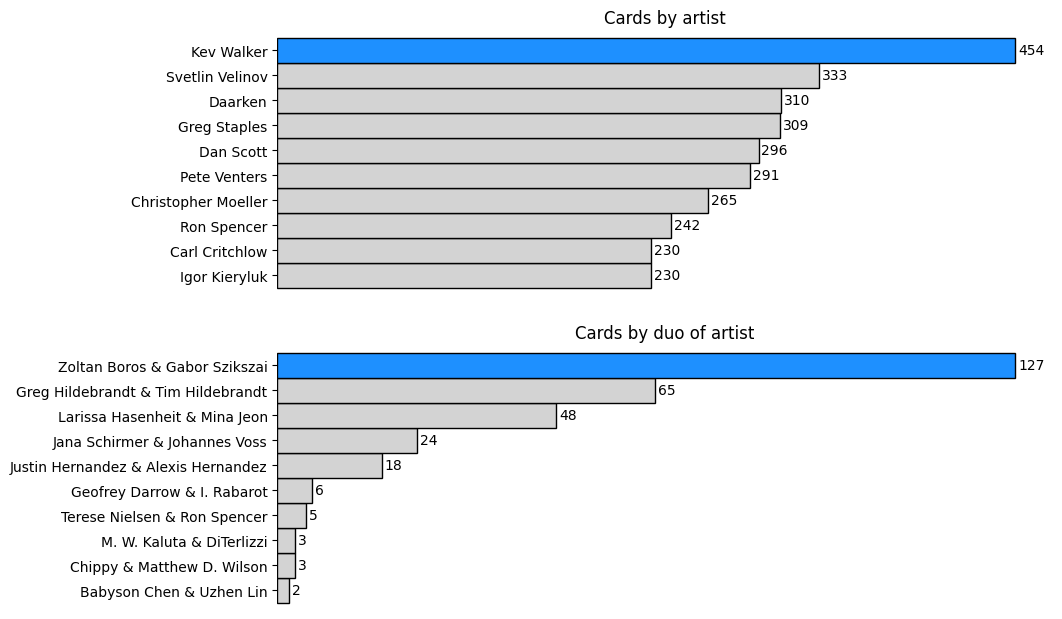

In [2]:
df = default_df[["name", "artist"]].dropna().drop_duplicates()


# separate solo and duo, by applying a mask
top_x = 10
df["mask"] = df["artist"].str.contains("&")  # & present if duo
df_solo = df[~df["mask"]].value_counts("artist", ascending=True)[-top_x:]
df_duo = df[df["mask"]].value_counts("artist", ascending=True)[-top_x:]

fig, axes = plt.subplots(nrows=2, figsize=(10, 7.5))
for axe in axes:  # remove the plot borders for each plot
    for side in ["top", "bottom", "right", "left"]:
        axe.spines[f"{side}"].set_visible(False)

solo_plot = df_solo.plot(
    kind="barh",
    ax=axes[0],
    rot=0,
    edgecolor="k",
    color=["dodgerblue" if x == 0 else "lightgrey" for x in range(top_x)][::-1],
    width=1,
    title="Cards by artist",
    ylabel="",
)
solo_plot.tick_params("x", which="both", bottom=False, labelbottom=False)
solo_plot.bar_label(solo_plot.containers[0], padding=2)

duo_plot = df_duo.plot(
    kind="barh",
    ax=axes[1],
    rot=0,
    edgecolor="black",
    color=["dodgerblue" if x == 0 else "lightgrey" for x in range(top_x)][::-1],
    width=1,
    title="Cards by duo of artist",
    ylabel="",
)
duo_plot.tick_params("x", which="both", bottom=False, labelbottom=False)
duo_plot.bar_label(duo_plot.containers[0], padding=2)

None  # avoid useless output

## What are the 10 most reprinted cards ?

Using the "name" column, I counted how many times each card appears in the dataframe, which gives us the number of unique print.  
Using the "scryfallIllustrationId" column, I also got the number of unique illustrations each card has among its printed version.  
I preferred to exclude the lands because they will obviously be on top, since the basic lands are printed in each main set and several times per set.

We can see that the most reprinted card is **Sol Ring**, its first version was released on **1993-08-05** in the set **Limited Edition Alpha**.  
We can also be seen that most of the reprints use an existing illustration.

Strangely enough I thought **Black Lotus** would appear in the most reprinted cards, but after further inspection it appear that **Black Lotus** is in the Reserved List.  
The Reserved List, is a list of card that will never be reprinted in order to preserve their value. The dataset has a column named "isReserved" referring to the Reserved list.


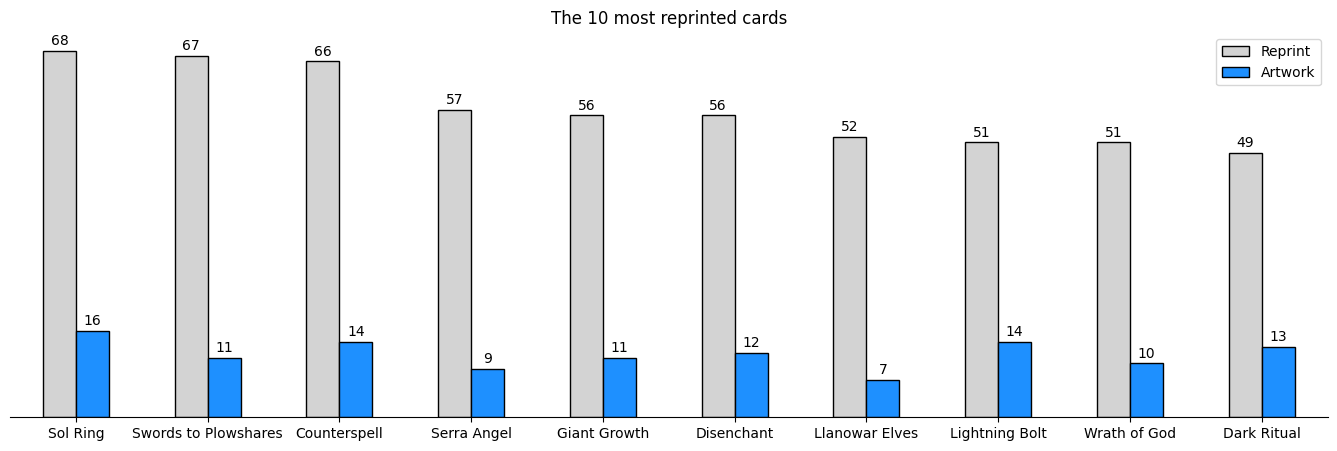

In [3]:
df = default_df
df = df.loc[(default_df["types"] != "Land")]  # exclude all lands
df = df[["name", "types", "scryfallIllustrationId"]]

# assemble the data to plot
temp_df = pd.DataFrame()
temp_df["Reprint"] = df["name"].value_counts()
cols = ["name", "scryfallIllustrationId"]
temp_df["Artwork"] = df[cols].drop_duplicates().groupby("name").count()
df = temp_df[:10]

fig, axes = plt.subplots(figsize=(17, 5))
for side in ["top", "right", "left"]:  # remove the plot borders
    axes.spines[f"{side}"].set_visible(False)

plot = df.plot(
    kind="bar",
    ax=axes,
    title="The 10 most reprinted cards",
    xlabel="",
    ylabel="",
    rot=0,
    edgecolor="black",
    color={"Artwork": "dodgerblue", "Reprint": "lightgrey"},
)
plot.tick_params("y", which="both", left=False, labelleft=False)
plot.bar_label(plot.containers[0], padding=2)
plot.bar_label(plot.containers[1], padding=2)

None

## What is the proportion of original concept ?

Using the "isReprint" column, I highlighted the proportion of card being a reprint of another card.

We can see that only 1/3 of the entries in the dataset represent an original card.


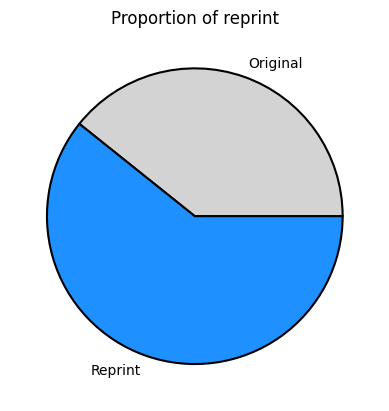

In [4]:
df = default_df

original = default_df[default_df["isReprint"] == 0].shape[0]
reprint = default_df[default_df["isReprint"] == 1].shape[0]

# assemble the number of reprint and original print
df = pd.Series(data={"Original": original, "Reprint": reprint})

plot = df.plot.pie(
    startangle=0,
    title="Proportion of reprint",
    colors=["lightgrey", "dodgerblue"],
    wedgeprops={"edgecolor": "black", "linewidth": 1.5, "antialiased": True},
)

None

## What are the most used keyword abilities?

Using the "keywords" column, I managed to count the number of times each keyword appears.  
We can see that the most common keyword ability among all printed card is **Flying**

_I will try to regroup the values, ​​by the color of the card on which the keyword appears_


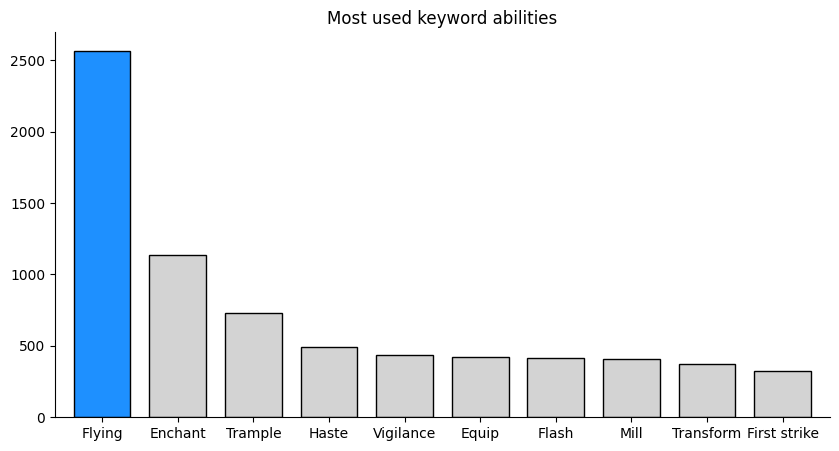

In [5]:
df = default_df.drop_duplicates(["name", "side"])

# parse the keywords columns and retrieve the most used abilities
df = (
    df["keywords"]
    .dropna()
    .str.split(",", expand=True)
    .stack(dropna=True)
    .value_counts()[:10]
)

fig, axes = plt.subplots(figsize=(10, 5))
for side in ["top", "right"]:  # remove some plot borders
    axes.spines[f"{side}"].set_visible(False)

plot = df.plot(
    kind="bar",
    ax=axes,
    title="Most used keyword abilities",
    xlabel="",
    ylabel="",
    rot=0,
    width=0.75,
    edgecolor="black",
    color=["dodgerblue" if x == 0 else "lightgrey" for x in range(10)],
)

None